<a href="https://colab.research.google.com/github/Sahlegiorgis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [101]:
import pandas as pd 
cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')
geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

Check for missing/null values in the three dataframes

In [102]:
# Your Work Here
cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [103]:
population.isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [104]:
geo_country_codes.isnull().sum()

geo                         0
g77_and_oecd_countries     14
income_3groups             55
income_groups              55
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
country                     0
un_state                    0
unicef_region              78
unicode_region_subtag      25
world_4region               2
world_6region              13
dtype: int64

In [105]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [106]:

cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

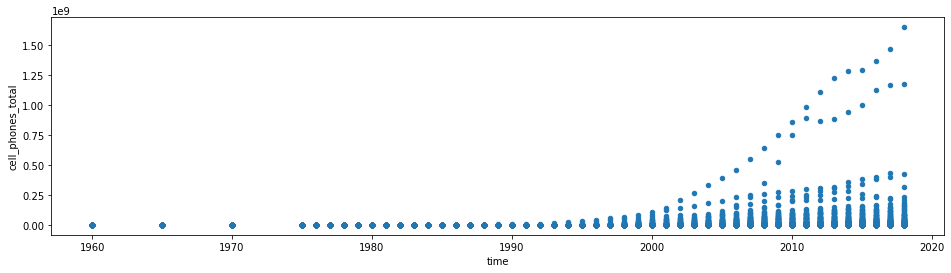

In [107]:
# Your Work Here
cell_phones.plot(kind='scatter', x='time', y='cell_phones_total', figsize=(16, 4))

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [108]:
# Your Work Here
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [109]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [110]:
df_new = pd.merge(cell_phones, population, how='inner')
display(df_new.head)


<bound method NDFrame.head of       geo  time  cell_phones_total  population_total
0     afg  1960                0.0           8996967
1     afg  1965                0.0           9956318
2     afg  1970                0.0          11173654
3     afg  1975                0.0          12689164
4     afg  1976                0.0          12943093
...   ...   ...                ...               ...
8781  zwe  2014         11798652.0          13586710
8782  zwe  2015         12757410.0          13814642
8783  zwe  2016         12878926.0          14030338
8784  zwe  2017         14092104.0          14236599
8785  zwe  2018         12908992.0          14438812

[8786 rows x 4 columns]>

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [111]:
# Your Work Here
geo_country_codes.head()

,geo,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,False,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,False,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,True,sa,AF,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,True,ssa,AO,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,False,NaN,AI,americas,america


In [112]:
# displaying the columns on geo_country_codes
geo_country_codes.columns

Index(['geo', 'g77_and_oecd_countries', 'income_3groups', 'income_groups',
       'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'country', 'un_state', 'unicef_region',
       'unicode_region_subtag', 'world_4region', 'world_6region'],
      dtype='object')

In [113]:
# merging the two data 
df_new1 = pd.merge(df_new[['geo', 'time', 'cell_phones_total',  'population_total']], geo_country_codes[['geo', 'country']])
display(df_new1)

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996967,Afghanistan
1,afg,1965,0.0,9956318,Afghanistan
2,afg,1970,0.0,11173654,Afghanistan
3,afg,1975,0.0,12689164,Afghanistan
4,afg,1976,0.0,12943093,Afghanistan
...,...,...,...,...,...
8781,zwe,2014,11798652.0,13586710,Zimbabwe
8782,zwe,2015,12757410.0,13814642,Zimbabwe
8783,zwe,2016,12878926.0,14030338,Zimbabwe
8784,zwe,2017,14092104.0,14236599,Zimbabwe


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [114]:
# Let's assign cell phone per person/cppp/' 
cppp = (df_new1['cell_phones_total']/df_new1['population_total'])
display(cppp)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
8781    0.868397
8782    0.923470
8783    0.917934
8784    0.989850
8785    0.894048
Length: 8786, dtype: float64

In [115]:
# let's add new collomun called "cppp" to the main data frame
df_new1['cppp'] = cppp
display(df_new1)

,geo,time,cell_phones_total,population_total,country,cppp
0,afg,1960,0.0,8996967,Afghanistan,0.000000
1,afg,1965,0.0,9956318,Afghanistan,0.000000
2,afg,1970,0.0,11173654,Afghanistan,0.000000
3,afg,1975,0.0,12689164,Afghanistan,0.000000
4,afg,1976,0.0,12943093,Afghanistan,0.000000
...,...,...,...,...,...,...
8781,zwe,2014,11798652.0,13586710,Zimbabwe,0.868397
8782,zwe,2015,12757410.0,13814642,Zimbabwe,0.923470
8783,zwe,2016,12878926.0,14030338,Zimbabwe,0.917934
8784,zwe,2017,14092104.0,14236599,Zimbabwe,0.989850


In [116]:
df_new1.columns

Index(['geo', 'time', 'cell_phones_total', 'population_total', 'country',
       'cppp'],
      dtype='object')

In [117]:
# your work is here
# to find per capita cellphone in the usa, we have to bring the total cell phone
# in United States in 2017 and the total population in 2017.


df_new1[(df_new1.country=='United States') & (df_new1.time==2017)] 

,geo,time,cell_phones_total,population_total,country,cppp
8319,usa,2017,400000000.0,325084758,United States,1.230448


In [118]:
cppp_United_States = 400000000/325084758
print(cppp_United_States)

1.2304483374148227


In [119]:
# population_total average
print(df_new1['population_total'].mean())

30021846.24732529


In [120]:
# cell_phone_total average
print(df_new1['cell_phones_total'].mean())

9701330.832006602


In [121]:
# cell_phone per person(cppp) of the data framee
cppp = df_new1['cell_phones_total'].mean()/df_new1['population_total'].mean()
print(cppp)

0.3231423794554578


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [122]:
# Your Work Here
df_new1.describe()

,time,cell_phones_total,population_total,cppp
count,8786.000000,8.786000e+03,8.786000e+03,8786.000000
mean,1994.721603,9.701331e+06,3.002185e+07,0.298025
std,14.525220,5.968296e+07,1.172833e+08,0.468332
min,1960.000000,0.000000e+00,4.377000e+03,0.000000
25%,1983.000000,0.000000e+00,1.474928e+06,0.000000
50%,1995.000000,8.500000e+03,5.816554e+06,0.002346
75%,2007.000000,2.028511e+06,1.823047e+07,0.532728
max,2018.000000,1.649302e+09,1.427648e+09,2.699755


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [123]:
# Your Work Here
# This is the cel_phones_total for the entire years until 2018
sort_by_cell_phones_total = df_new1.sort_values('cell_phones_total', ascending=False)
display(sort_by_cell_phones_total.head(n=5))

,geo,time,cell_phones_total,population_total,country,cppp
1531,chn,2018,1.649302e+09,1427647789,China,1.155258
1530,chn,2017,1.469882e+09,1421021794,China,1.034384
1529,chn,2016,1.364934e+09,1414049353,China,0.965266
1528,chn,2015,1.291984e+09,1406847868,China,0.918354
1527,chn,2014,1.286093e+09,1399453966,China,0.918996


In [124]:
df2 = df_new1.sort_values('cell_phones_total', ascending=False)
display(df2.head)

<bound method NDFrame.head of       geo  time  cell_phones_total  population_total      country      cppp
1531  chn  2018       1.649302e+09        1427647789        China  1.155258
1530  chn  2017       1.469882e+09        1421021794        China  1.034384
1529  chn  2016       1.364934e+09        1414049353        China  0.965266
1528  chn  2015       1.291984e+09        1406847868        China  0.918354
1527  chn  2014       1.286093e+09        1399453966        China  0.918996
...   ...   ...                ...               ...          ...       ...
4457  lao  1980       0.000000e+00           3258149          Lao  0.000000
4456  lao  1979       0.000000e+00           3207331          Lao  0.000000
4455  lao  1978       0.000000e+00           3168838          Lao  0.000000
4454  lao  1977       0.000000e+00           3135839          Lao  0.000000
0     afg  1960       0.000000e+00           8996967  Afghanistan  0.000000

[8786 rows x 6 columns]>

In [125]:
df2.set_index('time', inplace=True)


In [126]:
display(df2)

,geo,cell_phones_total,population_total,country,cppp
time,,,,,
2018,chn,1.649302e+09,1427647789,China,1.155258
2017,chn,1.469882e+09,1421021794,China,1.034384
2016,chn,1.364934e+09,1414049353,China,0.965266
2015,chn,1.291984e+09,1406847868,China,0.918354
2014,chn,1.286093e+09,1399453966,China,0.918996
...,...,...,...,...,...
1980,lao,0.000000e+00,3258149,Lao,0.000000
1979,lao,0.000000e+00,3207331,Lao,0.000000
1978,lao,0.000000e+00,3168838,Lao,0.000000


In [ ]:
df2.loc('time'['2017'], inplace=True, ascending=False)

In [128]:
df2.sort_values(by=['time'], ascending=False)

,geo,cell_phones_total,population_total,country,cppp
time,,,,,
2018,chn,1.649302e+09,1427647789,China,1.155258
2018,srb,8.431365e+06,8802741,Serbia,0.957811
2018,lbn,4.424185e+06,6859408,Lebanon,0.644981
2018,mrt,4.566502e+06,4403312,Mauritania,1.037061
2018,ltu,4.590441e+06,2801270,Lithuania,1.638700
...,...,...,...,...,...
1960,uzb,0.000000e+00,8526299,Uzbekistan,0.000000
1960,npl,0.000000e+00,10105060,Nepal,0.000000
1960,nor,0.000000e+00,3582508,Norway,0.000000


In [59]:
df2.iloc[2017:]

,geo,cell_phones_total,population_total,country,cppp
time,,,,,
2013,gab,2745229.0,1817070,Gabon,1.510800
2003,vnm,2742000.0,82301650,Vietnam,0.033316
2013,nam,2727913.0,2233506,Namibia,1.221359
2008,jam,2723323.0,2781869,Jamaica,0.978954
2015,gmb,2715672.0,2085860,Gambia,1.301944
...,...,...,...,...,...
1980,lao,0.0,3258149,Lao,0.000000
1979,lao,0.0,3207331,Lao,0.000000
1978,lao,0.0,3168838,Lao,0.000000


In [ ]:
df2 = pd.DataFrame(df2, columns = ['geo',	'time',	'cell_phones_total',	'population_total',	'country',	'cppp'])
df2 = df2.set_index('time', drop=True, append=False, verify_integrity=False)
print(df2)

In [ ]:
# assigning  the 2017 data 
df3 = df2.sort_values(by=[2017], ascending=False)
df3 = df2.loc(by=[time,2017], inplace=True)


In [ ]:
# displaying the top 5 cell_phones_total countries
# In this case China, India, Indonesia, United States and Russia are the top five countries in 2017
df2 = df2.sort_values(by=['cell_phens_total',['2017]'], ascending=False)
display(df)

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


### Part 1 — Recreate this explanatory visualization:



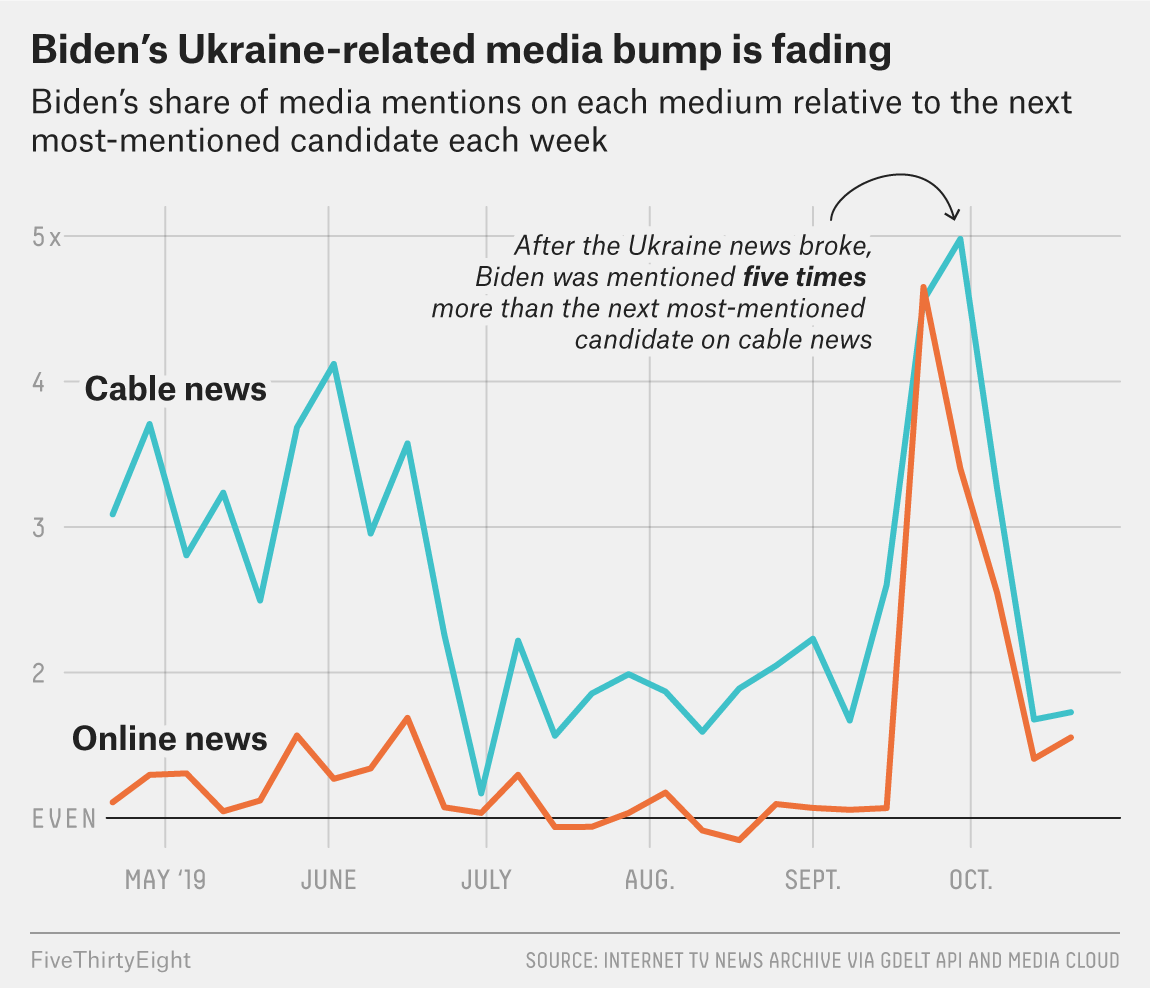

In [40]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

In [41]:
cable.head()

,date,name,matched_clips,all_candidate_clips,total_clips,pct_of_all_candidate_clips,query
0,2018-12-30,Amy Klobuchar,12,1279,76029,0.009382,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
1,2019-01-06,Amy Klobuchar,7,1031,82964,0.006790,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
2,2019-01-13,Amy Klobuchar,45,615,82521,0.073171,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
3,2019-01-20,Amy Klobuchar,10,991,83649,0.010091,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
4,2019-01-27,Amy Klobuchar,16,1914,80994,0.008359,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."


In [42]:
online.head()

,date,name,matched_stories,all_candidate_stories,pct_of_all_candidate_stories,query
0,2018-12-30,Amy Klobuchar,45.0,806,0.055831,"(""Amy Klobuchar"")"
1,2019-01-06,Amy Klobuchar,55.0,915,0.060109,"(""Amy Klobuchar"")"
2,2019-01-13,Amy Klobuchar,128.0,1052,0.121673,"(""Amy Klobuchar"")"
3,2019-01-20,Amy Klobuchar,55.0,1024,0.053711,"(""Amy Klobuchar"")"
4,2019-01-27,Amy Klobuchar,74.0,1605,0.046106,"(""Amy Klobuchar"")"


**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

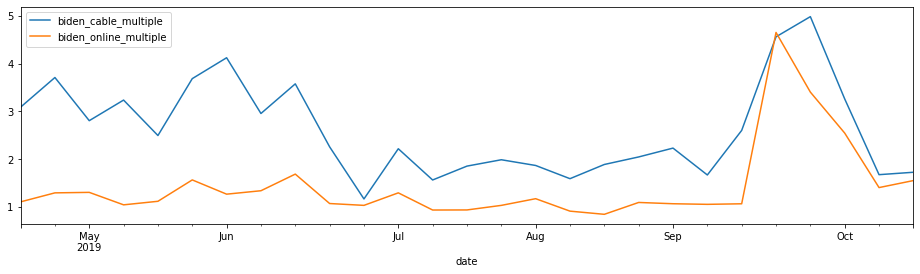

In [91]:
# ploting line graph based on the data provided on the two media networks.
data_for_graph.plot(kind='line', figsize=(16, 4))

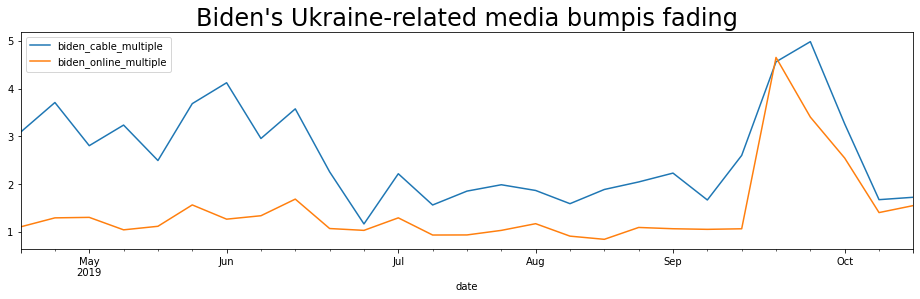

In [99]:
# showing Biden's matched stories and matched clips on cable and online data using line graph visualization.
data_for_graph.plot(kind='line', figsize=(16, 4))
plt.title("Biden's Ukraine-related media bumpis fading", fontsize=24)
plt.show()

In [43]:
# I tried to make all the requirment, but I couldn't show to the full and clear data vizulizing graph.
data_for_graph.plot(kind='line', figsize=(16, 4))
plt.title("Biden's Ukraine-related media bumpis fading", fontsize=24)
plt.subtitle("Biden's share of media mentions on each medium relative at the next most-mentioned candidate each week", fontsize=16, 'left', loc=None, pad=None)
plt.show()

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.
